<a href="https://colab.research.google.com/github/kr19al0711/ds-cs982-student-success/blob/main/CS982_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS982 : Predict student success in an undergraduate degreee considering demographic, past academic record and socio-economics factors.
- **Data Source and Contributors**:
  - https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
  - Realinho, Valentim, Mónica Vieira Martins, Jorge Machado, and Luís Baptista. 2021. Predict Students' Dropout and Academic Success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

## Importing Python Libraries

In [133]:
#pandas import
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None #supresses warnings when copying dataframes

#importing matplotlib and seaborn for plotting graphs
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing scikit learn libraries for modelling, preprocessing and analysing results
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,silhouette_score,calinski_harabasz_score,completeness_score,homogeneity_score
from sklearn.ensemble import RandomForestClassifier


## Importing Dataset

In [134]:
#url to the dataset
dataset_url = "https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip"
# dataset_url = "/content/data.csv"
source_data = pd.read_csv(dataset_url,sep=";")

## Data Cleanup

In [135]:
#checking data import
source_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [136]:
#summarizing the dataframe
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [137]:
#checking the dataframe shape
source_data.shape

(4424, 37)

In [138]:
#checking for null values
source_data.isna().sum().sum()

0



---


In the above steps we just skimmed through the dataset and made the following observations:

1.   The dataset was successfully imported into a pandas dataframe
2.   There are 4424 observations in the source dataset
3.   There are 37 columns in the source dataset
4.   There are no null values in the source dataset




---







### Dropping irrelevent rows and columns

In [139]:
#Fetching columns in that dataset
source_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd



---


The features in the `performance_data` list describe the performance of student during the academic year. Since we are predicting the success of the student based on factors like demographic, socio-economic and past academic factors these features can be dropped.

Additionally, the feature `Tuition fees up to date` is dropped too. Even though it indirectly relates to a students socio-economic factors, it can't be guaranteed at the time of enrollment.

Students who are currently enrolled and are pursuing their studies have the label `Enrolled`. The observations of these students are not useful in training the model as their actual academic success label could change. Hence we will also drop observations of students who are currently pursuing their studies.


---



In [140]:
#Removing \t from "Daytime/evening attendance\t" column
source_data.rename(columns = {"Daytime/evening attendance\t":"Daytime/evening attendance"},inplace=True)

# Demographic Features
demographic_data = [
    'Marital status',
    'Nacionality',
    'Gender',
    'Age at enrollment',
    'International',
    'Educational special needs'
]

# Socio-Economic Features
socio_economic_data = [
    'Mother’s qualification',
    'Father’s qualification',
    'Mother’s occupation',
    'Father’s occupation',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Scholarship holder',
    'Displaced',
    'Debtor'
]

# Academic Features
academic_data = [
    'Application order',
    'Course',
    'Previous qualification',
    'Previous qualification (grade)',
    'Admission grade',
    'Application mode',
    'Daytime/evening attendance'
]

# Academic Features to be dropped.
academic_data_dropped=[
    'Tuition fees up to date',
]

# Performance Features
performance_data = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

target = ["Target"]

drop_features = academic_data_dropped + performance_data


In [141]:
#Dropping enrolled student observations
data = source_data[source_data["Target"] != "Enrolled"]

In [142]:
#Dropping performance and irrelevent academic features
data.drop(drop_features,inplace=True,axis=1)

In [143]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,0,0,45,0,13.9,-0.3,0.79,Graduate


In [144]:
#summarizing updated dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  3630 non-null   int64  
 1   Application mode                3630 non-null   int64  
 2   Application order               3630 non-null   int64  
 3   Course                          3630 non-null   int64  
 4   Daytime/evening attendance      3630 non-null   int64  
 5   Previous qualification          3630 non-null   int64  
 6   Previous qualification (grade)  3630 non-null   float64
 7   Nacionality                     3630 non-null   int64  
 8   Mother's qualification          3630 non-null   int64  
 9   Father's qualification          3630 non-null   int64  
 10  Mother's occupation             3630 non-null   int64  
 11  Father's occupation             3630 non-null   int64  
 12  Admission grade                 3630 no

---

The number of observations and columns in our dataset are now reduced to 3630 and 23 respectively

---

## Exploratory Data Analysis


In [145]:
#creating a copy of data to perfrom EDA
eda_data = data.copy()

### Analysis on Demographic Features


#### Marital Status

In [146]:
#function to convert integer category to string category for marital status
def marital_status_categories(x):
  if x == 1:
    return "Single"
  elif x == 2:
    return "Married"
  elif x == 3:
    return "Widowed"
  elif x == 4:
    return "Divorced"
  elif x == 5:
    return "Facto Union"
  elif x == 6:
    return "Legally Separated"
  else:
    return "Other"

#apply the above function to convert dataframe fields
marital_status = eda_data[["Marital status","Target"]].copy()
marital_status["Marital status"] = marital_status["Marital status"].apply(lambda x: marital_status_categories(x))
marital_status

,Marital status,Target
0,Single,Dropout
1,Single,Graduate
2,Single,Dropout
3,Single,Graduate
4,Married,Graduate
...,...,...
4419,Single,Graduate
4420,Single,Dropout
4421,Single,Dropout
4422,Single,Graduate


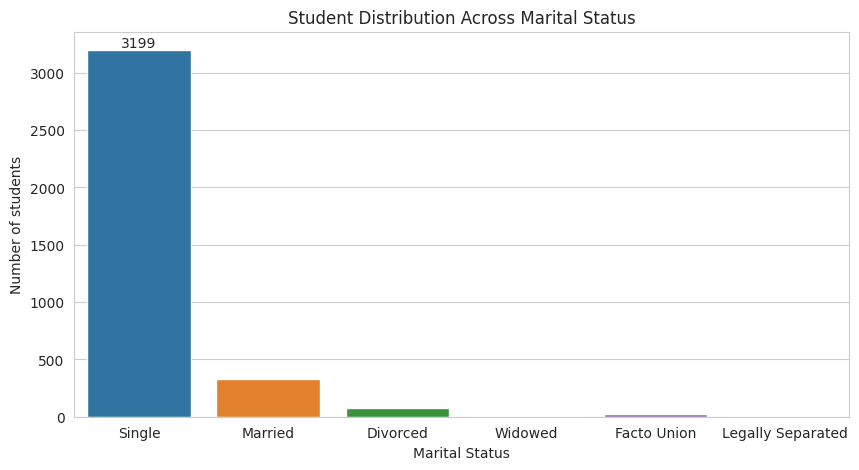

In [147]:
#distribution of students as per their marital status
plt.figure(figsize=(10, 5))
sns.set_style(style="whitegrid")
ax=sns.countplot(x="Marital status",data=marital_status,hue="Marital status",stat="count")
ax.bar_label(ax.containers[0])
plt.title('Student Distribution Across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of students')
plt.show()

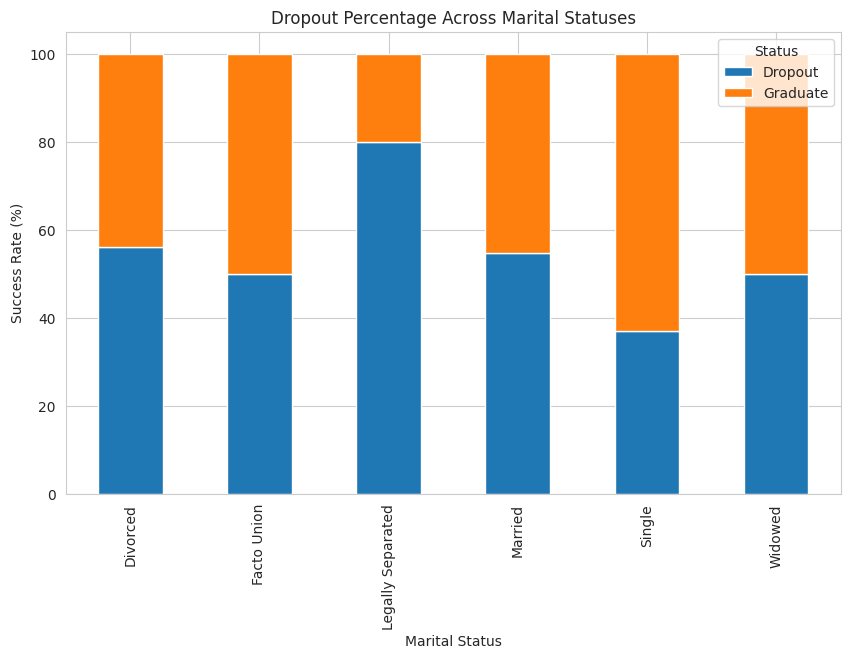

In [148]:
# Percentage of each marital category relative to the target variable
sns.set_style(style="whitegrid")
marital_target_counts = marital_status.groupby(['Marital status', 'Target']).size().unstack(fill_value=0)
marital_target_percentages = marital_target_counts.div(marital_target_counts.sum(axis=1), axis=0) * 100
marital_target_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dropout Percentage Across Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Success Rate (%)')
plt.legend(title='Status')
plt.show()

#### Nationality

In [149]:
#map nationality categories to string categories
nationality_mapper = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

def nationality_categories(x):
  if x in nationality_mapper.keys():
    return nationality_mapper[x]
  else:
    return "Others"

nationality = eda_data[["Nacionality","International","Target"]].copy()
nationality["Nacionality"] = nationality["Nacionality"].apply(lambda x: nationality_categories(x))
nationality.rename(columns={"Nacionality":"Nationality"},inplace=True)

In [150]:
nationality.head()

,Nationality,International,Target
0,Portuguese,0,Dropout
1,Portuguese,0,Graduate
2,Portuguese,0,Dropout
3,Portuguese,0,Graduate
4,Portuguese,0,Graduate


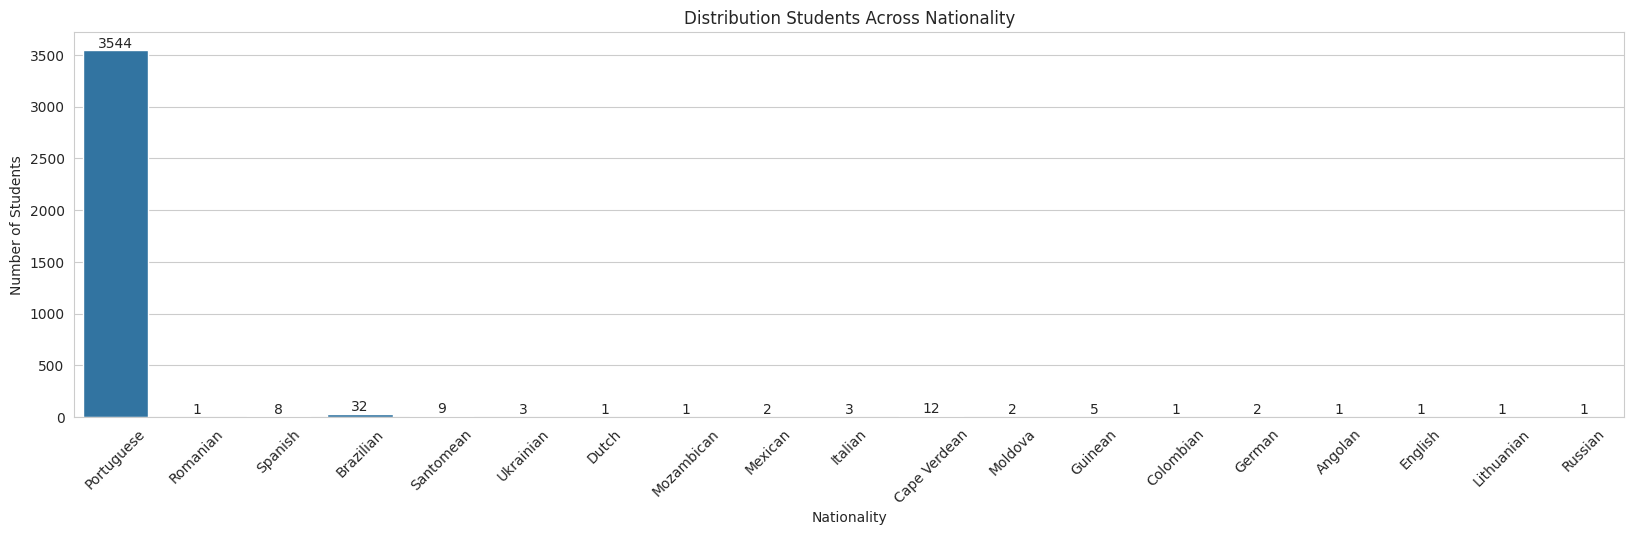

In [151]:
#distribution of students as per their nationality
plt.figure(figsize=(20, 5))
sns.set_style(style="whitegrid")
ax=sns.countplot(x="Nationality",data=nationality)
ax.bar_label(ax.containers[0])
plt.title('Distribution Students Across Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

#### Age and Gender

In [152]:
age_gender = eda_data[["Gender","Age at enrollment","Target"]].copy()
age_gender["Gender"] = age_gender["Gender"].apply(lambda x: "Male" if x == 1 else "Female")

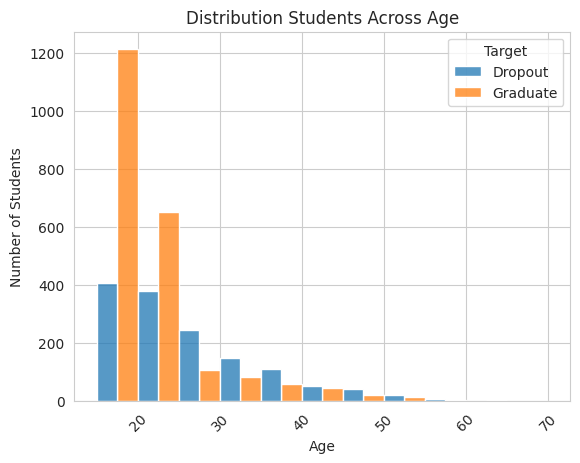

In [153]:
sns.set_style("whitegrid")
sns.histplot(data=age_gender,x="Age at enrollment",hue="Target",binwidth=5,multiple="dodge",stat="count",binrange=(15,70))
plt.title('Distribution Students Across Age')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
# plt.legend(title='Status')
plt.show()

In [154]:
# sns.set_style("whitegrid")
# sns.boxplot(age_gender["Age at enrollment"])

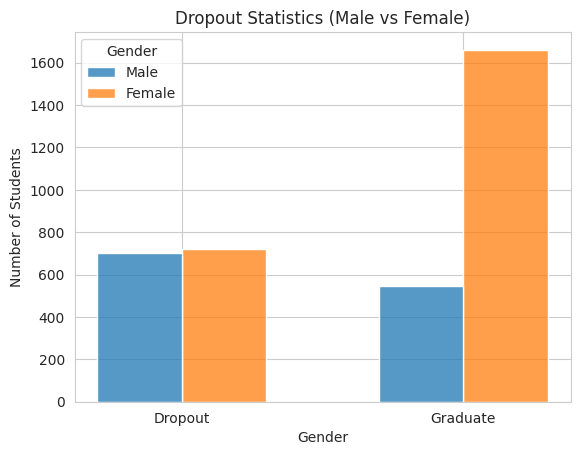

In [155]:
sns.set_style("whitegrid")
sns.histplot(data=age_gender,x="Target",hue="Gender",multiple="dodge",shrink=.6)
plt.title('Dropout Statistics (Male vs Female)')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

### Analysis on Socio-economic Features

#### Student's and Parent's Educational Qualification Level

In [156]:
#Scoring Previous qualification grade and Previous qualification
def qualification_level(qualification_type):
  if qualification_type in [5,44]:
    return 0.8
  elif qualification_type in [4,41,43]:
    return 0.7
  elif qualification_type in [2,3,40]:
    return 0.6
  elif qualification_type in [39,42]:
    return 0.5
  elif qualification_type in [1,13,18,20,22,31,33]:
    return 0.4
  elif qualification_type in [12,14,19,25,27]:
    return 0.3
  elif qualification_type in [11,26,30,38]:
    return 0.2
  elif qualification_type in [9,10,15,29,36,37]:
    return 0.1
  elif qualification_type in [6,34,35]:
    return 0
  else:
    return -1

parents_qualification = eda_data[["Mother's qualification","Father's qualification","Previous qualification","Target"]].copy()

parents_qualification["Mother's qualification"] = parents_qualification["Mother's qualification"].apply(lambda x: qualification_level(x))
parents_qualification["Father's qualification"] = parents_qualification["Father's qualification"].apply(lambda x: qualification_level(x))
parents_qualification["Previous qualification"] = parents_qualification["Previous qualification"].apply(lambda x: qualification_level(x))

parents_qualification["Mother's qualification category"] = parents_qualification["Mother's qualification"].apply(lambda x: x * 10)
parents_qualification["Father's qualification category"] = parents_qualification["Father's qualification"].apply(lambda x: x * 10)
parents_qualification["Previous qualification category"] = parents_qualification["Previous qualification"].apply(lambda x: x * 10)

In [157]:
parents_qualification.head()

,Mother's qualification,Father's qualification,Previous qualification,Target,Mother's qualification category,Father's qualification category,Previous qualification category
0,0.3,0.3,0.4,Dropout,3.0,3.0,4.0
1,0.4,0.6,0.4,Graduate,4.0,6.0,4.0
2,0.1,0.1,0.4,Dropout,1.0,1.0,4.0
3,0.2,0.1,0.4,Graduate,2.0,1.0,4.0
4,0.1,0.2,0.4,Graduate,1.0,2.0,4.0


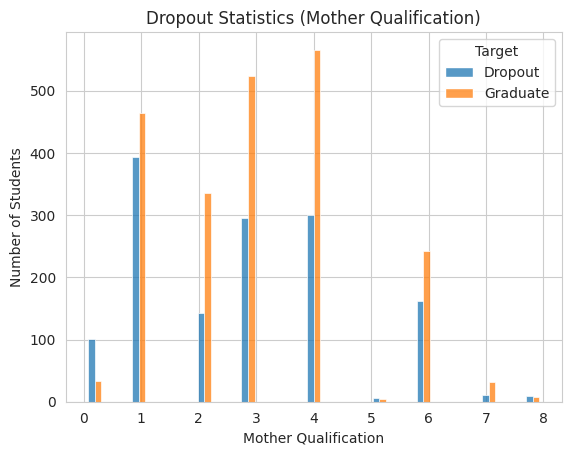

In [158]:
sns.set_style("whitegrid")
sns.histplot(data=parents_qualification,x="Mother's qualification category",hue="Target",multiple="dodge",shrink=.6)
plt.title('Dropout Statistics (Mother Qualification)')
plt.xlabel('Mother Qualification')
plt.ylabel('Number of Students')
plt.show()

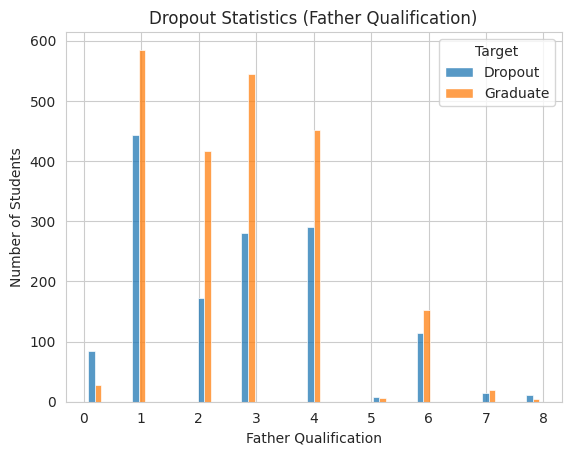

In [159]:
sns.set_style("whitegrid")
sns.histplot(data=parents_qualification,x="Father's qualification category",hue="Target",multiple="dodge",shrink=.6)
plt.title('Dropout Statistics (Father Qualification)')
plt.xlabel('Father Qualification')
plt.ylabel('Number of Students')
plt.show()

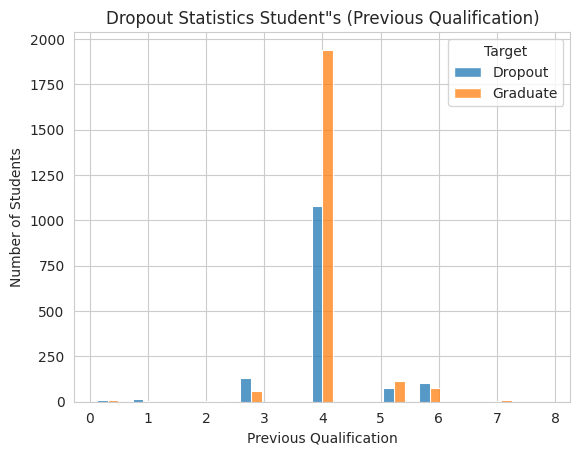

In [160]:
sns.set_style("whitegrid")
sns.histplot(data=parents_qualification,x="Previous qualification category",hue="Target",multiple="dodge",shrink=.6)
plt.title('Dropout Statistics Student"s (Previous Qualification)')
plt.xlabel('Previous Qualification')
plt.ylabel('Number of Students')
plt.show()

#### Parent's Occupation

In [161]:
#mapping integer categories to occupation level according to EQF description
def occupation_level(level):
  if level in [1]:
    return 1.0
  elif level in [122,121,112,2]:
    return 0.9
  elif level in [135,124,11,101,123,114]:
    return 0.8
  elif level in [131,132,102,10,125]:
    return 0.7
  elif level in [183,181,174,143,134,103,3,7,8]:
    return 0.6
  elif level in [182,175,172,171,161,154,151,144,141,6,4,99]:
    return 0.5
  elif level in [163,153,151,5]:
    return 0.4
  elif level in [195,194,152]:
    return 0.3
  elif level in [193,192,9,2,191]:
    return 0.2
  elif level in [90]:
    return 0.1
  elif level in [0]:
    return 0
  else:
    return -1

parents_occupation = eda_data[["Mother's occupation","Father's occupation","Target"]].copy()
parents_occupation["Mother's occupation"] = parents_occupation["Mother's occupation"].apply(lambda x: occupation_level(x))
parents_occupation["Father's occupation"] = parents_occupation["Father's occupation"].apply(lambda x: occupation_level(x))
parents_occupation["Mother's occupation category"] = parents_occupation["Mother's occupation"].apply(lambda x: x * 10)
parents_occupation["Father's occupation category"] = parents_occupation["Father's occupation"].apply(lambda x: x * 10)

In [162]:
parents_occupation.describe()

,Mother's occupation,Father's occupation,Mother's occupation category,Father's occupation category
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.403609,0.468733,4.036088,4.687328
std,0.237038,0.229872,2.370380,2.298724
min,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,2.000000,2.000000
50%,0.400000,0.500000,4.000000,5.000000
75%,0.500000,0.600000,5.000000,6.000000
max,1.000000,1.000000,10.000000,10.000000


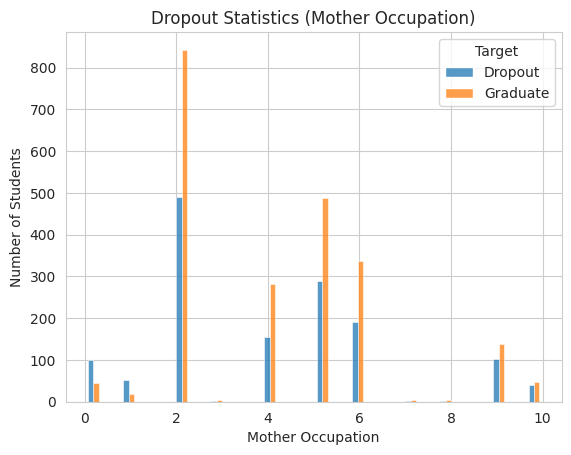

In [163]:
sns.set_style("whitegrid")
sns.histplot(data=parents_occupation,x="Mother's occupation category",hue="Target",multiple="dodge",shrink=.6)
plt.title('Dropout Statistics (Mother Occupation)')
plt.xlabel('Mother Occupation')
plt.ylabel('Number of Students')
plt.show()

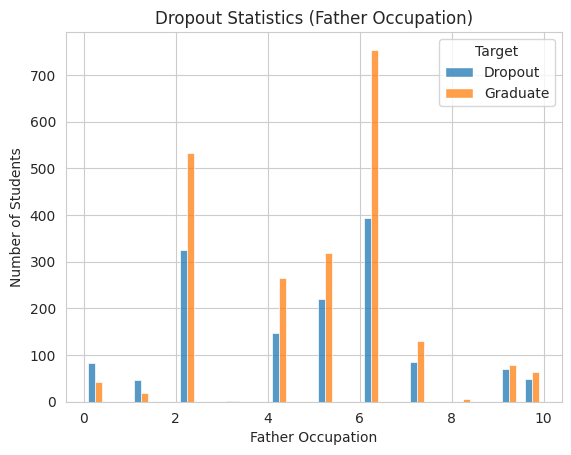

In [164]:
sns.set_style("whitegrid")
sns.histplot(data=parents_occupation,x="Father's occupation category",hue="Target",multiple="dodge",shrink=.6)
plt.title('Dropout Statistics (Father Occupation)')
plt.xlabel('Father Occupation')
plt.ylabel('Number of Students')
plt.show()

### Academic Features

#### Application Mode and Order

In [165]:
application = eda_data[["Application mode","Application order","Target"]].copy()

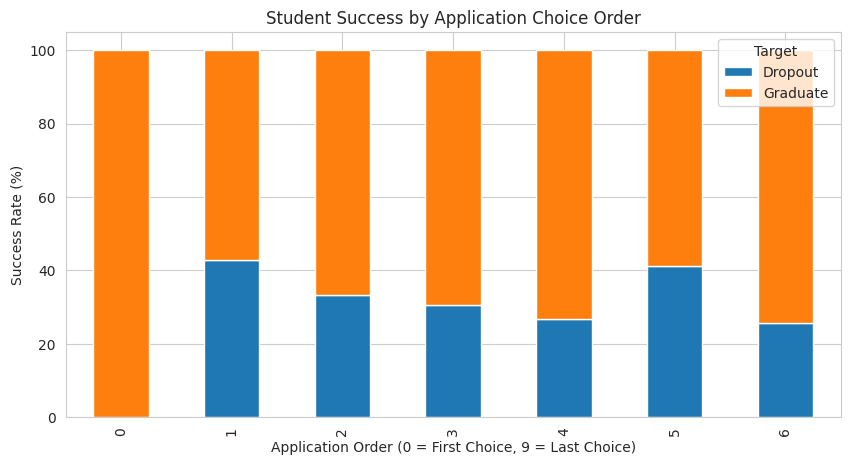

In [166]:
# Application Order
application_count =  application.groupby(['Application order', 'Target']).size().unstack(fill_value=0)
application_count_percentages = application_count.div(application_count.sum(axis=1), axis=0) * 100
application_count_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Student Success by Application Choice Order')
plt.xlabel('Application Order (0 = First Choice, 9 = Last Choice)')
plt.ylabel('Success Rate (%)')
plt.legend(title='Target')
plt.show()

In [167]:
# application.groupby(['Application mode', 'Target']).size().unstack(fill_value=0).sort_values(by=["Graduate","Dropout"],ascending=False)
# top 5 application modes are 1,17,39,42. we can categories the first 4 and then put the rest in others category

# 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)

top_application_modes = {
                            1:"1st phase general contingent",
                            17 : "2nd phase - general contingent",
                            39:"Over 23 years old",
                            43:"Transfer",
                            0:"Others"
                         }
def application_mode_categories(x):
  if x in top_application_modes.keys():
    return top_application_modes[x]
  else:
    return "Others"


application["Application mode"] = application["Application mode"].apply(lambda x: application_mode_categories(x))
application.head()

,Application mode,Application order,Target
0,2nd phase - general contingent,5,Dropout
1,Others,1,Graduate
2,1st phase general contingent,5,Dropout
3,2nd phase - general contingent,2,Graduate
4,Over 23 years old,1,Graduate


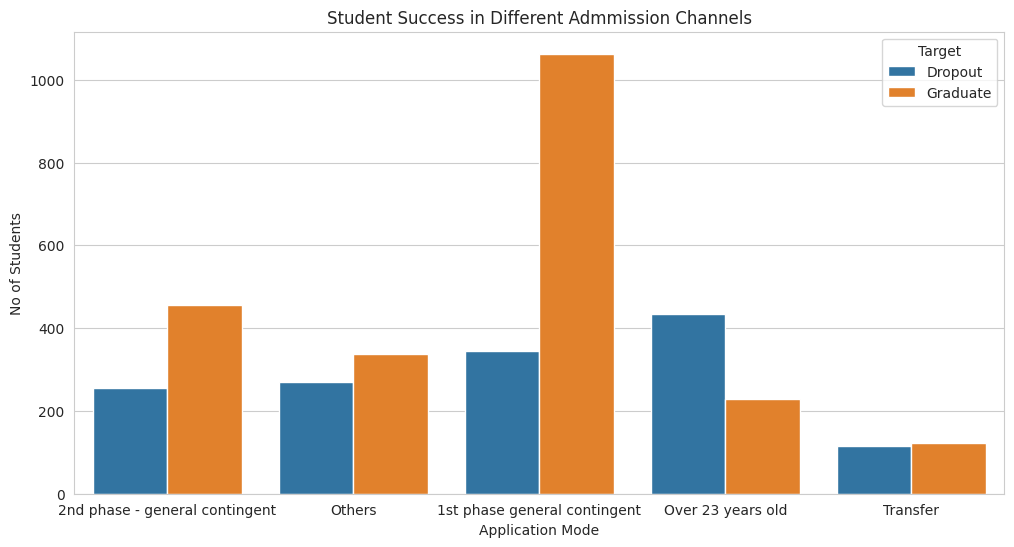

In [168]:
# Application Mode
plt.figure(figsize=(12, 6))
sns.countplot(x='Application mode', data=application,hue="Target")
plt.title('Student Success in Different Admmission Channels')
plt.xlabel('Application Mode')
plt.ylabel('No of Students')
plt.show()

#### Course, Scholarship holder, Debtor

In [169]:
academic = eda_data[["Course","Scholarship holder","Debtor","Target"]].copy()

In [170]:
#bining courses it into departments

course_departments = {
    33: "Engineering and Technology",
    171: "Design and Creative Arts",
    8014: "Social Sciences and Humanities",
    9003: "Agriculture and Veterinary Sciences",
    9070: "Design and Creative Arts",
    9085: "Agriculture and Veterinary Sciences",
    9119: "Engineering and Technology",
    9130: "Agriculture and Veterinary Sciences",
    9147: "Management and Business",
    9238: "Social Sciences and Humanities",
    9254: "Management and Business",
    9500: "Health Sciences",
    9556: "Health Sciences",
    9670: "Design and Creative Arts",
    9773: "Social Sciences and Humanities",
    9853: "Social Sciences and Humanities",
    9991: "Management and Business"
}

academic["Course Type"] = academic["Course"].apply(lambda x: course_departments[x])
academic.groupby(["Course Type","Target"]).size().unstack(fill_value=0)

Target,Dropout,Graduate
Course Type,,
Agriculture and Veterinary Sciences,254,301
Design and Creative Arts,228,354
Engineering and Technology,100,15
Health Sciences,151,584
Management and Business,366,331
Social Sciences and Humanities,322,624


Text(0.5, 0, 'Course')

<Figure size 1000x500 with 0 Axes>

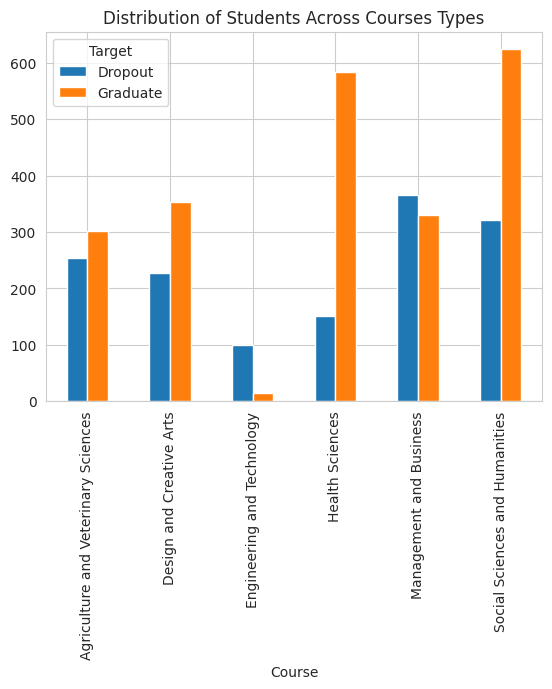

In [171]:
plt.figure(figsize=(10, 5))
sns.set_style(style="whitegrid")
academic.groupby(["Course Type","Target"]).size().unstack(fill_value=0).plot(kind="bar")
plt.title('Distribution of Students Across Courses Types')
plt.xlabel('Course')

In [172]:
academic["Debtor"] = academic["Debtor"].apply(lambda x: "Yes" if x == 1 else "No")
academic["Scholarship holder"] = academic["Scholarship holder"].apply(lambda x: "Yes" if x == 1 else "No")

## Modelling

### Preprocessing

In [173]:
#splitting features and labels
#feature dataframe
X = data.drop(columns="Target",axis=1)

#label dataframe
y = data["Target"]

#encoding labels
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)
# y.columns = ["Target"]

In [174]:
X.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.549036,0.011019,0.113774,0.344077,0.266942,23.461157,0.023691,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.497658,0.104407,0.317580,0.475132,0.442423,7.827994,0.152107,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,25.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,16.200000,3.700000,3.510000


#### Encoding Marital Status

In [175]:
# print("Unique categories in Marital Status : ",X["Marital status"].unique())

def marital_status_categories(x):
  if x == 1:
    return 1
  elif x == 2:
    return -1
  else:
    return 0

X["Marital status"] = X["Marital status"].apply(lambda x: marital_status_categories(x))
# print("Unique categories in Marital Status : ",X["Marital status"].unique())

# encoded_marital_status = pd.get_dummies(X["Marital status"],prefix="Marital status",dtype=int)
# X = pd.concat([X,encoded_marital_status],axis=1)
# X.drop("Marital status",axis=1,inplace=True)

# print(X.head())
# print(X.info())

#### Downscaling Age



In [176]:
X["Age at enrollment"] = X["Age at enrollment"].apply(lambda x: x/100)
X.loc[:,"Age at enrollment"].describe()

,Age at enrollment
count,3630.000000
mean,0.234612
std,0.078280
min,0.170000
25%,0.190000
50%,0.200000
75%,0.250000
max,0.700000


#### Dropping Nacionality Feature

In [177]:
print("Number of students from nationality other than Portugal: ",X.loc[X["Nacionality"] != 1].count()["Nacionality"])
print("Number of students form Portugal: ", X.loc[X["Nacionality"] == 1].count()["Nacionality"])

# we can drop the nacionality feature as majority of students are form portugal. The International feature already infers this information
X.drop("Nacionality",axis=1,inplace=True)

Number of students from nationality other than Portugal:  86
Number of students form Portugal:  3544


#### Scoring Parent's Occupation and Qualification

In [178]:
#mapping occupation integer values to eqf levels
def occupation_level(level):
  if level in [1]:
    return 1.0
  elif level in [122,121,112,2]:
    return 0.9
  elif level in [135,124,11,101,123,114]:
    return 0.8
  elif level in [131,132,102,10,125]:
    return 0.7
  elif level in [183,181,174,143,134,103,3,7,8]:
    return 0.6
  elif level in [182,175,172,171,161,154,151,144,141,6,4,99]:
    return 0.5
  elif level in [163,153,151,5]:
    return 0.4
  elif level in [195,194,152]:
    return 0.3
  elif level in [193,192,9,2,191]:
    return 0.2
  elif level in [90]:
    return 0.1
  elif level in [0]:
    return 0
  else:
    return -1

X["Mother's occupation"] = X["Mother's occupation"].apply(lambda x: occupation_level(x))
X["Father's occupation"] = X["Father's occupation"].apply(lambda x: occupation_level(x))

In [179]:
#mapping qualification integer values to eqf levels
def qualification_level(qualification_type):
  if qualification_type in [5,44]:
    return 0.8
  elif qualification_type in [4,41,43]:
    return 0.7
  elif qualification_type in [2,3,40]:
    return 0.6
  elif qualification_type in [39,42]:
    return 0.5
  elif qualification_type in [1,13,18,20,22,31,33]:
    return 0.4
  elif qualification_type in [12,14,19,25,27]:
    return 0.3
  elif qualification_type in [11,26,30,38]:
    return 0.2
  elif qualification_type in [9,10,15,29,36,37]:
    return 0.1
  elif qualification_type in [6,34,35]:
    return 0
  else:
    return -1

X["Father's qualification"] = X["Father's qualification"].apply(lambda x: qualification_level(x))
X["Mother's qualification"] = X["Mother's qualification"].apply(lambda x: qualification_level(x))
X["Previous qualification"] = X["Previous qualification"].apply(lambda x: qualification_level(x))

#### Scaling Student Admission and Previous Qualification Grade

In [180]:
#downscaling admission grade from range 0-200 to 0-1
X["Admission grade"] = X["Admission grade"].apply(lambda x: x/200)
X["Previous qualification (grade)"] = X["Previous qualification (grade)"].apply(lambda x: x/200)
X["Previous qualification (grade)"].describe()

,Previous qualification (grade)
count,3630.000000
mean,0.664603
std,0.066192
min,0.475000
25%,0.625000
50%,0.665500
75%,0.700000
max,0.950000


#### Scaling and Scoring Application Order


In [181]:
#downscaling values from range 0-9 to 0-1. assigning higher score by order of choice. first choice application assign higher value and vice-versa
def application_order_score(x):
  return 1 - x / 10
X["Application order"] = X["Application order"].apply(lambda x: application_order_score(x))

#### Encoding Application Mode

In [182]:
#select only the top 5 application modes
def application_mode_categories(x):
  if x in top_application_modes.keys():
    return top_application_modes[x]
  else:
    return "Others"

X["Application mode"] = X["Application mode"].apply(lambda x: application_mode_categories(x))
encoded_application_mode = pd.get_dummies(X["Application mode"],prefix="Application mode",dtype=int)
X = pd.concat([X,encoded_application_mode],axis=1)
X.drop("Application mode",axis=1,inplace=True)
# print(X.head())
# print(X.info())

#### Encoding Course

In [183]:
#testing count frequency encoding
X["Course"].describe()

,Course
count,3630.000000
mean,8853.980992
std,2068.760082
min,33.000000
25%,9085.000000
50%,9254.000000
75%,9556.000000
max,9991.000000


In [184]:
#bining it into departments

course_departments = {
    33: "Engineering and Technology",
    171: "Design and Creative Arts",
    8014: "Social Sciences and Humanities",
    9003: "Agriculture and Veterinary Sciences",
    9070: "Design and Creative Arts",
    9085: "Agriculture and Veterinary Sciences",
    9119: "Engineering and Technology",
    9130: "Agriculture and Veterinary Sciences",
    9147: "Management and Business",
    9238: "Social Sciences and Humanities",
    9254: "Management and Business",
    9500: "Health Sciences",
    9556: "Health Sciences",
    9670: "Design and Creative Arts",
    9773: "Social Sciences and Humanities",
    9853: "Social Sciences and Humanities",
    9991: "Management and Business"
}

X["Course Type"] = X["Course"].apply(lambda x: course_departments[x])
course_type = pd.get_dummies(X["Course Type"],prefix="CourseType",dtype=int)
X = pd.concat([X,course_type],axis=1)
X.drop("Course Type",axis=1,inplace=True)


### Unsupervised Learning

In [185]:
#take a scaled copy of processed data.
X_unsupervised = pd.DataFrame(scale(X),columns=X.columns)

In [186]:
X_cluster = X_unsupervised.copy()
y_cluster = y.copy()

In [187]:
def kmeans_clustering(cluster_size):
  #creating k-means clustering object
  kmeans = KMeans(n_clusters=cluster_size, init='random', max_iter = 1000, n_init = 5, random_state = 0, tol = 0.001)
  label =kmeans.fit_predict(X_cluster,y_cluster)
  silhouette_score_results_kmeans = silhouette_score(X_cluster, kmeans.labels_)
  # print(f"Silhouette Score : {silhouette_score_results_kmeans}")
  calinski_harabasz_score_results_kmeans = calinski_harabasz_score(X_cluster,kmeans.labels_)
  # print(f"Calinski Harabasz Score : {calinski_harabasz_score_results_kmeans}")
  completeness_score_results_kmeans = completeness_score(y_cluster,kmeans.labels_)
  # print(f"Completeness Score : {completeness_score_results_kmeans}")
  homogeneity_score_results_kmeans = homogeneity_score(y_cluster,kmeans.labels_)
  # print(f"Homogeneity Score : {homogeneity_score_results_kmeans}")
  return (silhouette_score_results_kmeans,calinski_harabasz_score_results_kmeans,homogeneity_score_results_kmeans,completeness_score_results_kmeans)


In [188]:
print(kmeans_clustering(2))

(0.13946771092066426, 356.62921897675943, 0.054922983585857725, 0.06755166591186446)


<Axes: >

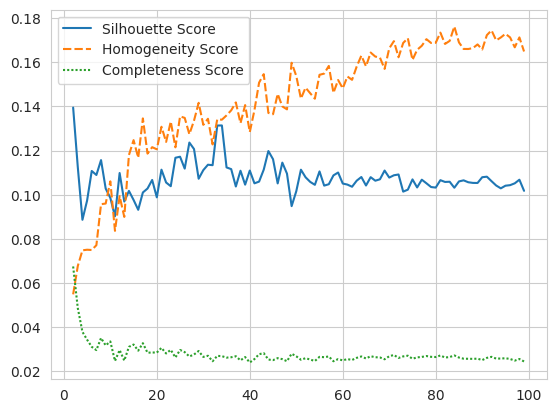

In [189]:
result = pd.DataFrame(columns=["Silhouette Score","Homogeneity Score","Completeness Score"])
for i in range(2,100):
  result.loc[i,"Silhouette Score"],calinski_harabasz,result.loc[i,"Homogeneity Score"],result.loc[i,"Completeness Score"] = kmeans_clustering(i)
sns.lineplot(data=result)

### Supervised Learning

In [190]:
#splitting dataset into training and testing datasets
X_supervised = X.copy()
X_train,X_test,y_train,y_test = train_test_split(X_supervised,y,test_size=0.25,random_state = 1)

print(f"Training feature shape : {X_train.shape}")
print(f"Training label shape : {y_train.shape}")
print(f"Testing feature shape : {X_test.shape}")
print(f"Testing label shape : {y_test.shape}")

Training feature shape : (2722, 32)
Training label shape : (2722,)
Testing feature shape : (908, 32)
Testing label shape : (908,)


In [191]:
# param_grid = {
#     'n_estimators': [25, 50, 100, 150 , 200],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9 ,12],
#     'max_leaf_nodes': [3, 6, 9 , 12],
# }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,verbose=1)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)


In [192]:
random_forest = RandomForestClassifier(class_weight="balanced",max_depth=12, max_features=None, max_leaf_nodes=12,n_estimators=50,random_state=1)
random_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=None,
                       max_leaf_nodes=12, n_estimators=50, random_state=1)

In [193]:
#fetching predictions
y_predict = random_forest.predict(X_test)

In [194]:
#generating classification report
random_forest_classification_report = classification_report(y_test,y_predict)
print(random_forest_classification_report)

              precision    recall  f1-score   support

           0       0.64      0.74      0.69       358
           1       0.81      0.73      0.77       550

    accuracy                           0.74       908
   macro avg       0.73      0.74      0.73       908
weighted avg       0.75      0.74      0.74       908



<Axes: title={'center': 'Confusion Matrix of Random Forest Model \nDrop Out=0 Graduate= 1'}>

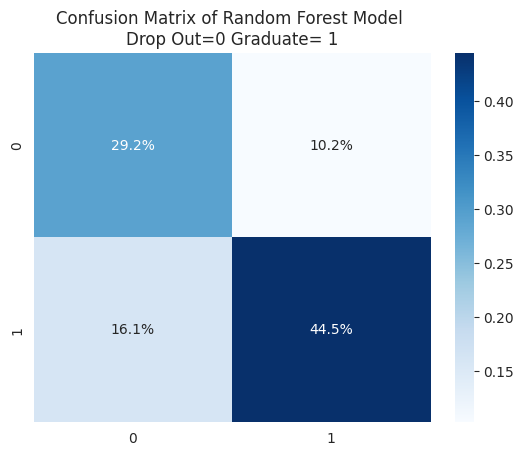

In [195]:
#generating confusion matrix
random_forest_confusion_matrix = confusion_matrix(y_test,y_predict)
# print(random_forest_confusion_matrix)
plt.title("Confusion Matrix of Random Forest Model \nDrop Out=0 Graduate= 1")
sns.set_style(style="whitegrid")
sns.heatmap(random_forest_confusion_matrix/np.sum(random_forest_confusion_matrix),annot=True,cmap="Blues",fmt='.1%')
# plt.plot()

In [196]:
#checking the probability matrix
y_predict_prob = random_forest.predict_proba(X_test)[:,1]

In [197]:
#random forest classifier
feature_scores = pd.Series(random_forest.feature_importances_,index=X.columns).sort_values(ascending=False).iloc[:5,]
print(feature_scores.index.to_list())

['Scholarship holder', 'Age at enrollment', 'Debtor', 'CourseType_Health Sciences', 'Gender']


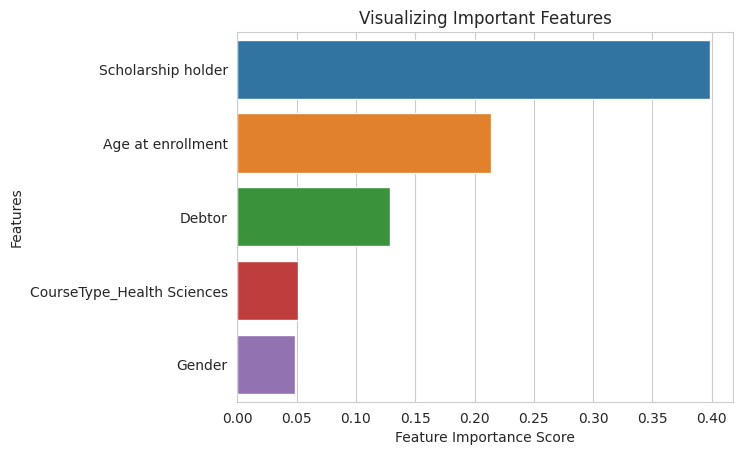

In [198]:
sns.barplot(x=feature_scores,y=feature_scores.index,hue=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()